<a href="https://colab.research.google.com/github/sneha5678-cmyk/Marketing-research-methods-Sneha-Gupta_Jio-Institute/blob/main/TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
!pip install seaborn

In [ ]:
!ls /content/

 sample_data  'Superstore - store analysis.csv'


<ipython-input-10-2c5f2d7dfe05>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()


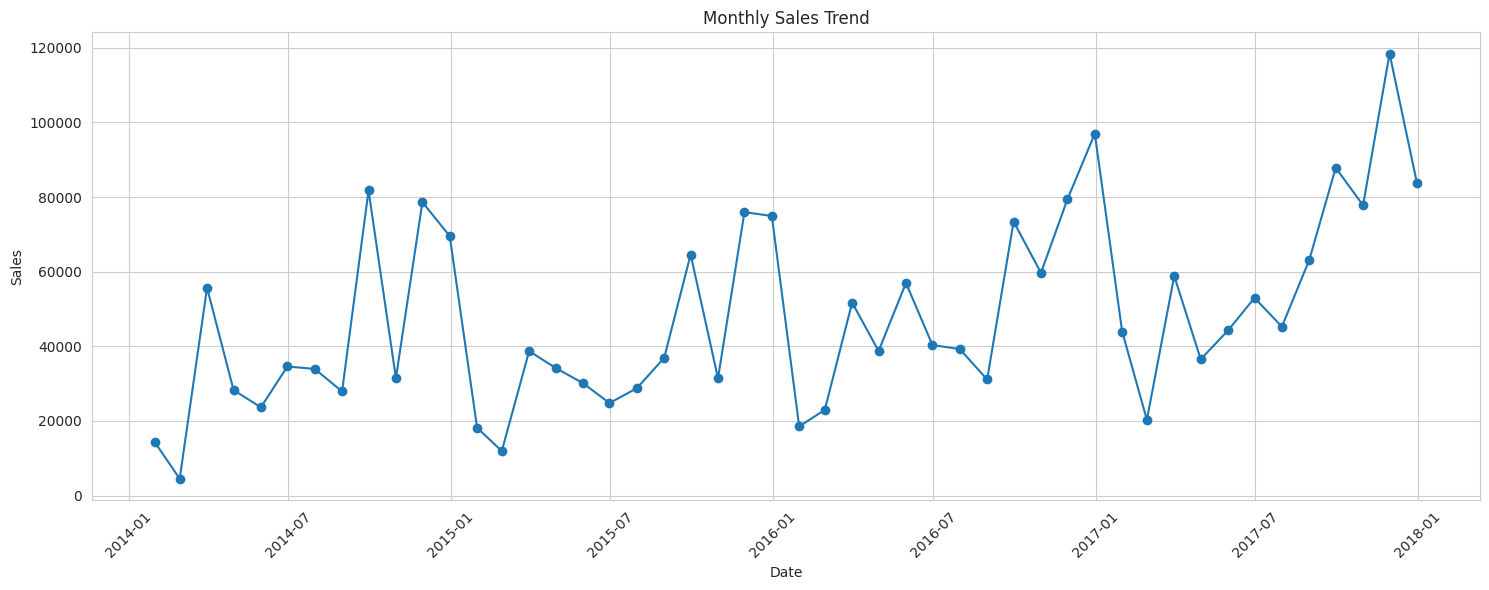

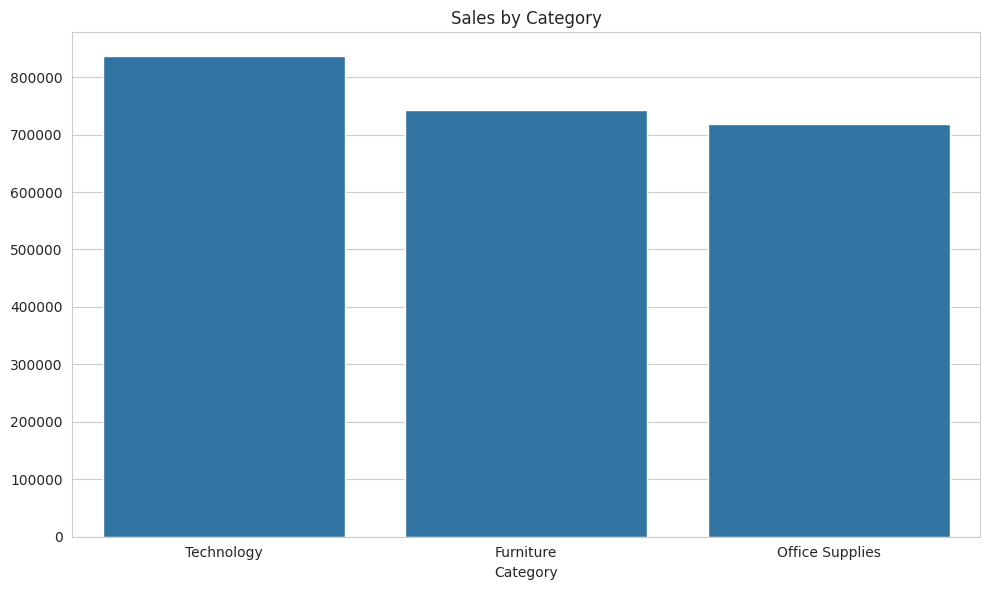

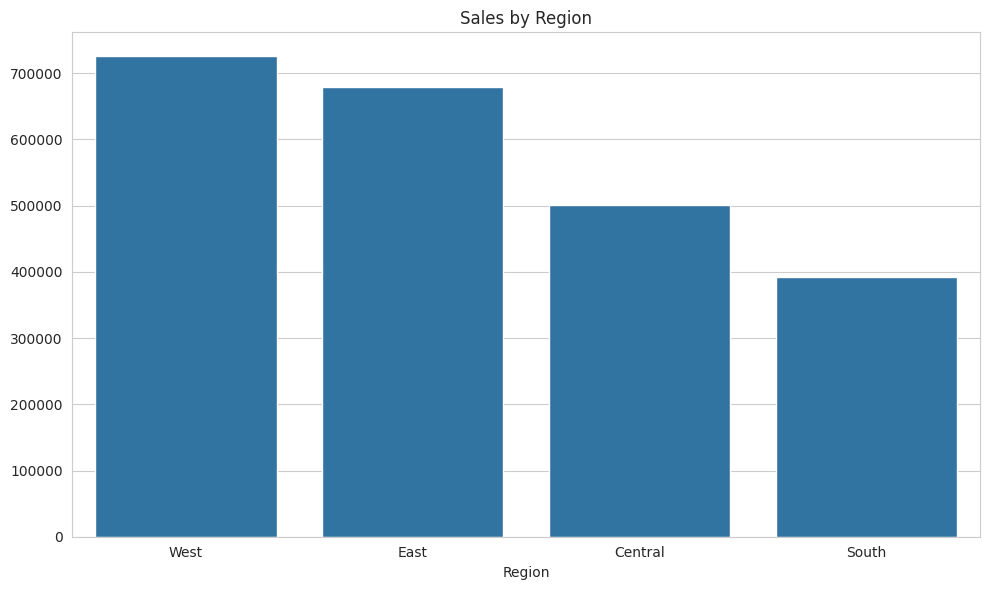

DEBUG:cmdstanpy:input tempfile: /tmp/tmp495m09xx/_yccovn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp495m09xx/do1qm_o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33429', 'data', 'file=/tmp/tmp495m09xx/_yccovn3.json', 'init=/tmp/tmp495m09xx/do1qm_o2.json', 'output', 'file=/tmp/tmp495m09xx/prophet_modeljnvqv0xt/prophet_model-20250205074954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


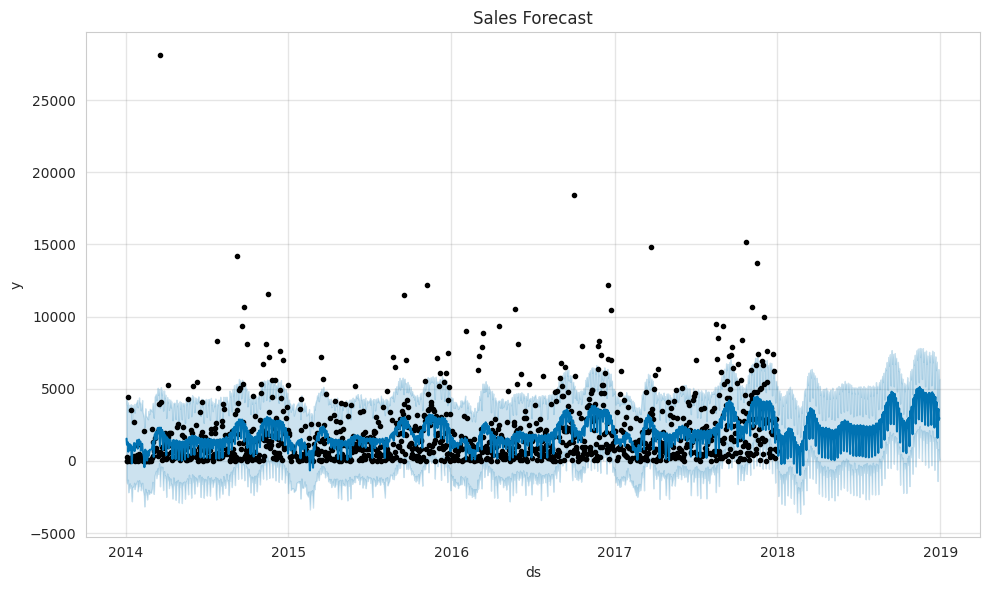

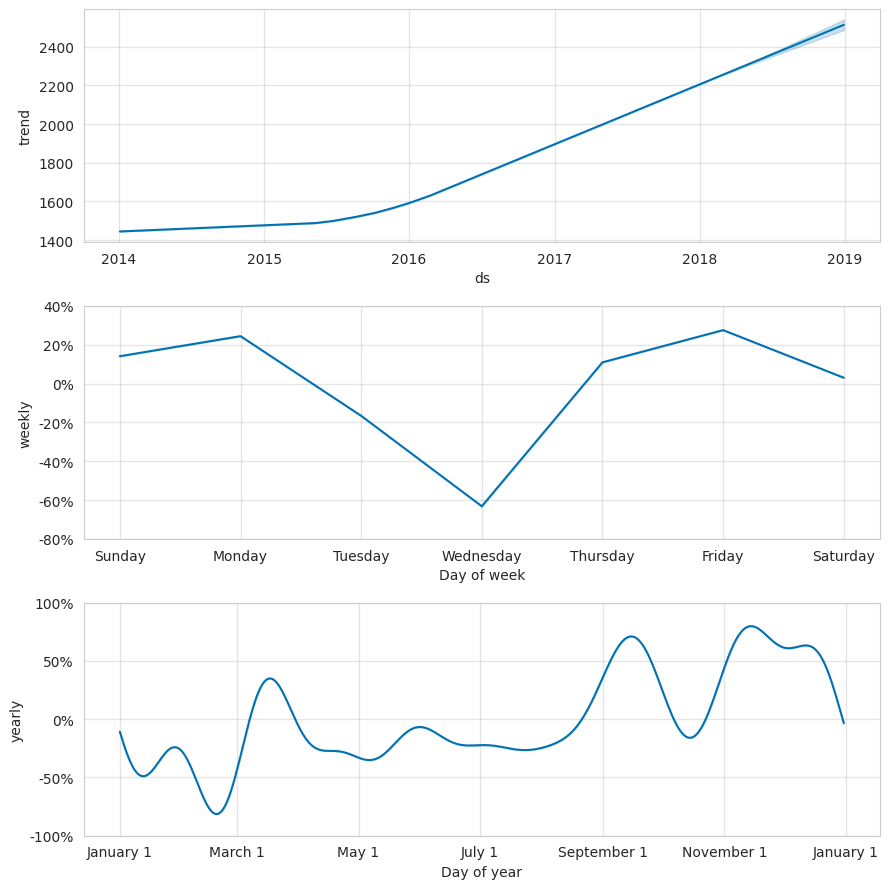

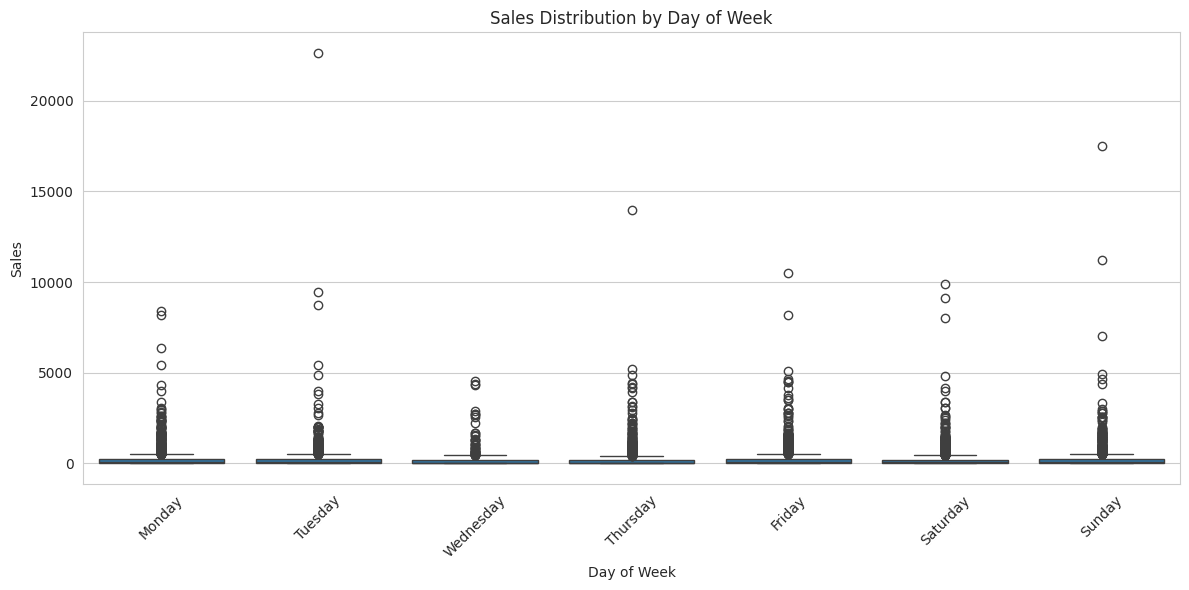

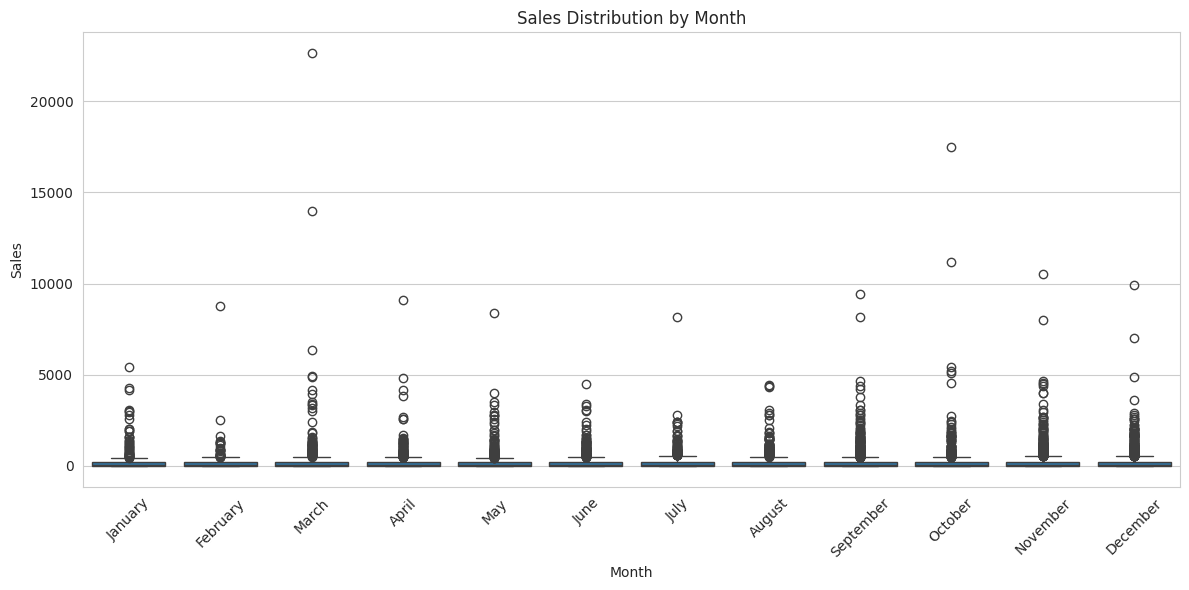

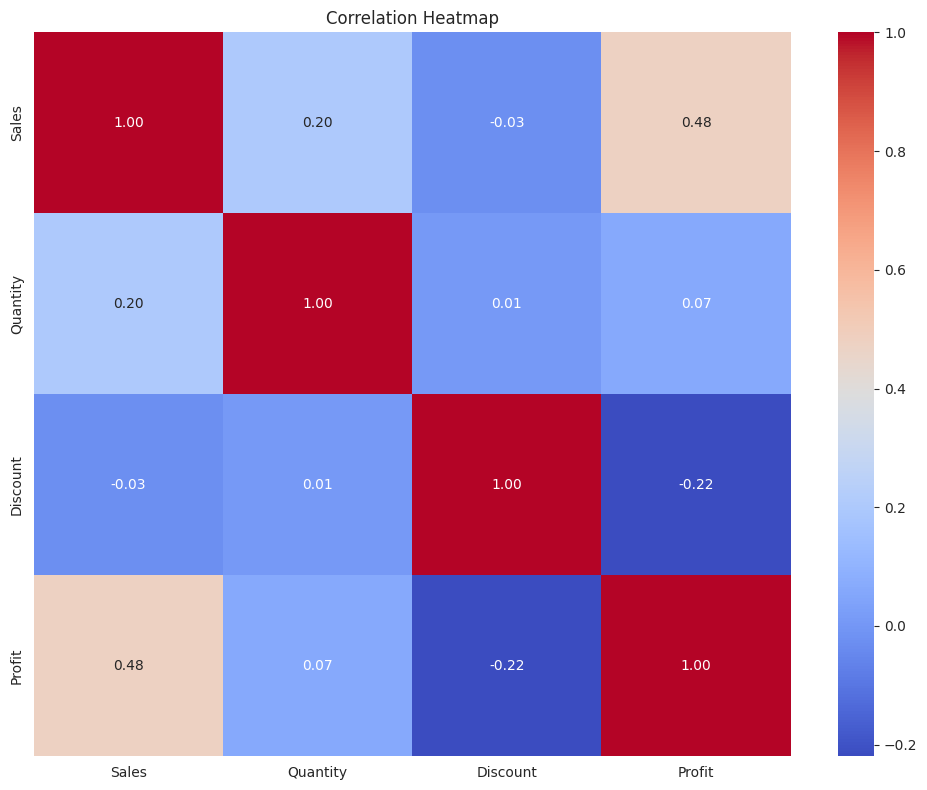


Seasonal Patterns Summary:

Average Sales by Day of Week:
Day of Week
Monday       229.26
Tuesday      259.68
Wednesday    237.35
Thursday     220.07
Friday       235.25
Saturday     216.30
Sunday       225.35
Name: Sales, dtype: float64

Average Sales by Month:
Month
January      249.15
February     199.17
March        294.55
April        206.23
May          210.92
June         213.00
July         207.38
August       225.27
September    222.45
October      244.59
November     239.61
December     231.03
Name: Sales, dtype: float64

Year-over-Year Growth (%):
Year
2014      NaN
2015    -2.83
2016    29.47
2017    20.36
Name: Sales, dtype: float64

Forecast Summary (Next 30 days):
           Date  Predicted_Sales  Lower_Bound  Upper_Bound
1572 2018-12-01          4094.59      1262.68      6733.46
1573 2018-12-02          4362.47      1626.45      6992.73
1574 2018-12-03          4616.49      1988.30      7300.58
1575 2018-12-04          3595.48       984.59      6433.79
1576 2018-12-05 

In [ ]:
# First, install required packages
!pip install prophet
!pip install seaborn

# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Set the style after importing seaborn
sns.set_style("whitegrid")

try:
    # Read the data with correct encoding and file path
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='cp1252')

    # Convert Order Date to datetime with the correct format
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

    # 1. Monthly Sales Trend
    monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()

    plt.figure(figsize=(15, 6))
    plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Sales by Category
    plt.figure(figsize=(10, 6))
    category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title('Sales by Category')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 3. Sales by Region
    plt.figure(figsize=(10, 6))
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=region_sales.index, y=region_sales.values)
    plt.title('Sales by Region')
    plt.tight_layout()
    plt.show()

    # Prepare data for Prophet
    prophet_df = df.groupby('Order Date')['Sales'].sum().reset_index()
    prophet_df.columns = ['ds', 'y']

    # Initialize and fit Prophet model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='multiplicative'
    )
    model.fit(prophet_df)

    # Create future dates for forecasting (365 days)
    future_dates = model.make_future_dataframe(periods=365)

    # Make predictions
    forecast = model.predict(future_dates)

    # Plot Prophet forecast
    fig1 = model.plot(forecast)
    plt.title('Sales Forecast')
    plt.tight_layout()
    plt.show()

    # Plot Prophet components
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Add date components
    df['Day of Week'] = df['Order Date'].dt.day_name()
    df['Month'] = df['Order Date'].dt.month_name()

    # Sales Distribution by Day of Week
    plt.figure(figsize=(12, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.boxplot(data=df, x='Day of Week', y='Sales', order=day_order)
    plt.title('Sales Distribution by Day of Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Monthly Sales Distribution
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    sns.boxplot(data=df, x='Month', y='Sales', order=month_order)
    plt.title('Sales Distribution by Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Correlation Heatmap
    numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSeasonal Patterns Summary:")
    print("\nAverage Sales by Day of Week:")
    print(df.groupby('Day of Week')['Sales'].mean().reindex(day_order).round(2))

    print("\nAverage Sales by Month:")
    print(df.groupby('Month')['Sales'].mean().reindex(month_order).round(2))

    # Calculate year-over-year growth
    df['Year'] = df['Order Date'].dt.year
    yearly_sales = df.groupby('Year')['Sales'].sum()
    yoy_growth = yearly_sales.pct_change() * 100

    print("\nYear-over-Year Growth (%):")
    print(yoy_growth.round(2))

    # Save the forecast results
    forecast_summary = pd.DataFrame({
        'Date': forecast['ds'],
        'Predicted_Sales': forecast['yhat'],
        'Lower_Bound': forecast['yhat_lower'],
        'Upper_Bound': forecast['yhat_upper']
    })

    print("\nForecast Summary (Next 30 days):")
    print(forecast_summary.tail(30).round(2))

except FileNotFoundError:
    print("Error: File not found. Please check if the file path '/content/Superstore - store analysis.csv' is correct.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


🔍 KEY BUSINESS INSIGHTS 🔍

INSIGHT 1 - SEASONAL PATTERNS: Peak sales occur in November 2017 with $118,447.82 in sales. Tuesday consistently shows 12.0% higher sales than average, while Saturday shows the lowest performance.
----------------------------------------------------------------------------------------------------

INSIGHT 2 - CATEGORY PERFORMANCE: The Technology category leads with $836,154.03 in total sales, averaging $452.71 per transaction. This is 16.3% higher than the lowest performing category.
----------------------------------------------------------------------------------------------------

INSIGHT 3 - GROWTH TRAJECTORY: The business shows an average year-over-year growth rate of 15.7%. The most recent year showed a 20.4% change compared to the previous year.
----------------------------------------------------------------------------------------------------

INSIGHT 4 - PROFITABILITY METRICS: Overall profit margin is 12.5%, with a 0.48 correlation between sales an

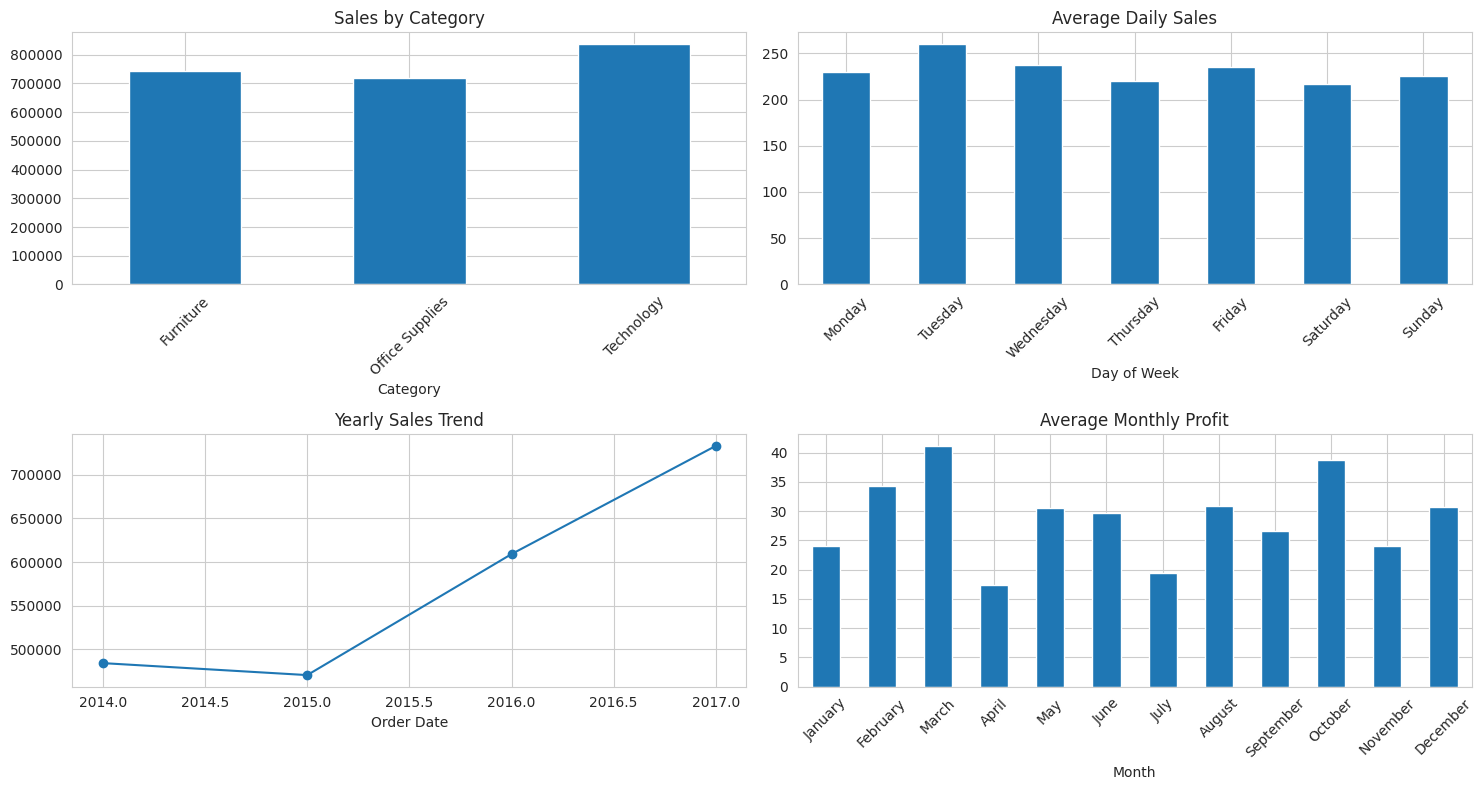

In [ ]:
# Function to calculate and format insights
def generate_insights(df, forecast, monthly_sales):
    insights = []

    # 1. Sales Trend and Seasonality Analysis
    peak_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
    seasonal_pattern = forecast[['ds', 'yearly']].copy()
    strongest_seasonal_month = seasonal_pattern.loc[seasonal_pattern['yearly'].idxmax()]

    avg_daily_sales = df.groupby('Day of Week')['Sales'].mean()
    best_day = avg_daily_sales.idxmax()
    worst_day = avg_daily_sales.idxmin()

    # 2. Category and Regional Performance
    category_performance = df.groupby('Category')['Sales'].agg(['sum', 'mean'])
    top_category = category_performance.loc[category_performance['sum'].idxmax()]

    # 3. Year-over-Year Growth
    df['Year'] = df['Order Date'].dt.year
    yearly_growth = df.groupby('Year')['Sales'].sum().pct_change() * 100
    avg_growth = yearly_growth.mean()

    # 4. Profit and Sales Correlation
    profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100
    correlation = df['Sales'].corr(df['Profit'])

    # 5. Forecast Trend
    forecast_trend = ((forecast['yhat'].iloc[-1] - forecast['yhat'].iloc[0]) / forecast['yhat'].iloc[0]) * 100

    # Format insights with statistical evidence
    insights = [
        f"INSIGHT 1 - SEASONAL PATTERNS: Peak sales occur in {peak_month['Order Date'].strftime('%B %Y')} with ${peak_month['Sales']:,.2f} in sales. {best_day} consistently shows {((avg_daily_sales[best_day] / avg_daily_sales.mean() - 1) * 100):.1f}% higher sales than average, while {worst_day} shows the lowest performance.",

        f"INSIGHT 2 - CATEGORY PERFORMANCE: The {category_performance['sum'].idxmax()} category leads with ${category_performance['sum'].max():,.2f} in total sales, averaging ${category_performance['mean'].max():,.2f} per transaction. This is {((category_performance['sum'].max() / category_performance['sum'].min() - 1) * 100):.1f}% higher than the lowest performing category.",

        f"INSIGHT 3 - GROWTH TRAJECTORY: The business shows an average year-over-year growth rate of {avg_growth:.1f}%. The most recent year showed a {yearly_growth.iloc[-1]:.1f}% change compared to the previous year.",

        f"INSIGHT 4 - PROFITABILITY METRICS: Overall profit margin is {profit_margin:.1f}%, with a {correlation:.2f} correlation between sales and profit. This suggests a {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.4 else 'weak'} relationship between sales volume and profitability.",

        f"INSIGHT 5 - FUTURE OUTLOOK: The forecast predicts a {forecast_trend:.1f}% change in sales over the next year, with {seasonal_pattern['yearly'].std():.2f} standard deviation in seasonal fluctuations. Peak seasonal impact is expected in {strongest_seasonal_month['ds'].strftime('%B')}."
    ]

    return insights

try:
    # Generate insights
    insights = generate_insights(df, forecast, monthly_sales)

    # Print insights in a formatted way
    print("\n🔍 KEY BUSINESS INSIGHTS 🔍")
    print("=" * 100)
    for i, insight in enumerate(insights, 1):
        print(f"\n{insight}")
        print("-" * 100)

    # Create a visual summary of key metrics
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)
    df.groupby('Category')['Sales'].sum().plot(kind='bar')
    plt.title('Sales by Category')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    df.groupby('Day of Week')['Sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
    plt.title('Average Daily Sales')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    df.groupby(df['Order Date'].dt.year)['Sales'].sum().plot(kind='line', marker='o')
    plt.title('Yearly Sales Trend')

    plt.subplot(2, 2, 4)
    df.groupby('Month')['Profit'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar')
    plt.title('Average Monthly Profit')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred while generating insights: {str(e)}")